<a href="https://colab.research.google.com/github/PratikshitSingh/Algotrading/blob/master/prediction__for_stock_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [31]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA (1).csv


In [32]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [33]:
df.shape

(2416, 7)

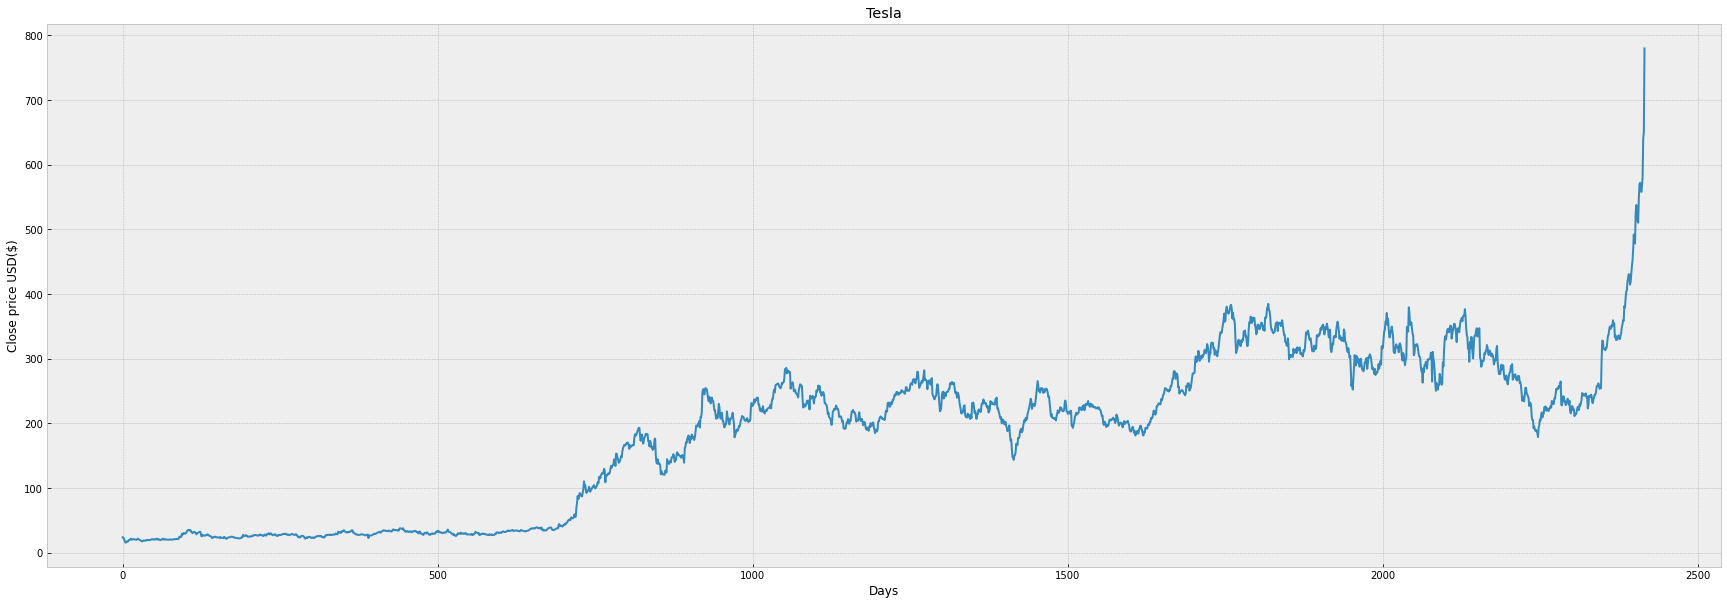

In [34]:
plt.figure(figsize=(30,10))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Close price USD($)')
plt.plot(df['Close'])
plt.show()

In [35]:
df = df[['Close']]
df.head()

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001
4,16.110001


In [36]:
df.tail()

,Close
2411,566.900024
2412,580.989990
2413,640.809998
2414,650.570007
2415,780.000000


In [37]:
#Predict 'x' days out into the future

future_days = 30
df['prediction'] = df[['Close']].shift(-future_days)
df.head()

,Close,prediction
0,23.889999,17.900000
1,23.830000,17.600000
2,21.959999,18.320000
3,19.200001,18.780001
4,16.110001,19.150000


In [38]:
x = np.array(df.drop(['prediction'],1))[:-future_days]
print(x)
x.shape

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [381.5     ]
 [378.98999 ]
 [393.149994]]


(2386, 1)

In [39]:
y = np.array(df['prediction'][:-future_days])

In [40]:
print(y)
y.shape

[ 17.9       17.6       18.32     ... 640.809998 650.570007 780.      ]


(2386,)

In [41]:
#Split 75:25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [42]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [45]:
x_future = df.drop(['prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(x_future)
x_future.shape

[[326.579987]
 [335.540009]
 [337.140015]
 [345.089996]
 [349.929993]
 [346.109985]
 [349.350006]
 [352.170013]
 [349.98999 ]
 [359.519989]
 [352.220001]
 [354.829987]
 [333.040009]
 [336.339996]
 [328.920013]
 [331.290009]
 [329.940002]
 [334.869995]
 [336.200012]
 [333.029999]
 [330.369995]
 [335.890015]
 [339.529999]
 [348.839996]
 [352.700012]
 [359.679993]
 [358.390015]
 [381.5     ]
 [378.98999 ]
 [393.149994]]


(30, 1)

In [46]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)
print()


[404.040009 405.589996 312.209991 305.200012 430.940002 430.380005
 414.700012 418.329987 430.26001  443.01001  451.540009 469.059998
 510.5      481.339996 478.149994 524.859985 537.919983 518.5
 513.48999  510.5      547.200012 569.559998 572.200012 564.820007
 558.02002  566.900024 580.98999  640.809998 650.570007 780.      ]

[332.82767822 341.7690135  343.36568258 351.29908338 356.12898624
 352.31694512 355.55020884 358.36433453 356.18885812 365.69898168
 358.41421828 361.01876098 339.27422742 342.56733208 335.16282394
 337.52787716 336.18068568 341.10039686 342.42764002 339.26423829
 336.60978191 342.11828954 345.75068211 355.0412625  358.89322819
 365.85865198 364.57136431 387.63315192 385.12837671 399.25884909]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


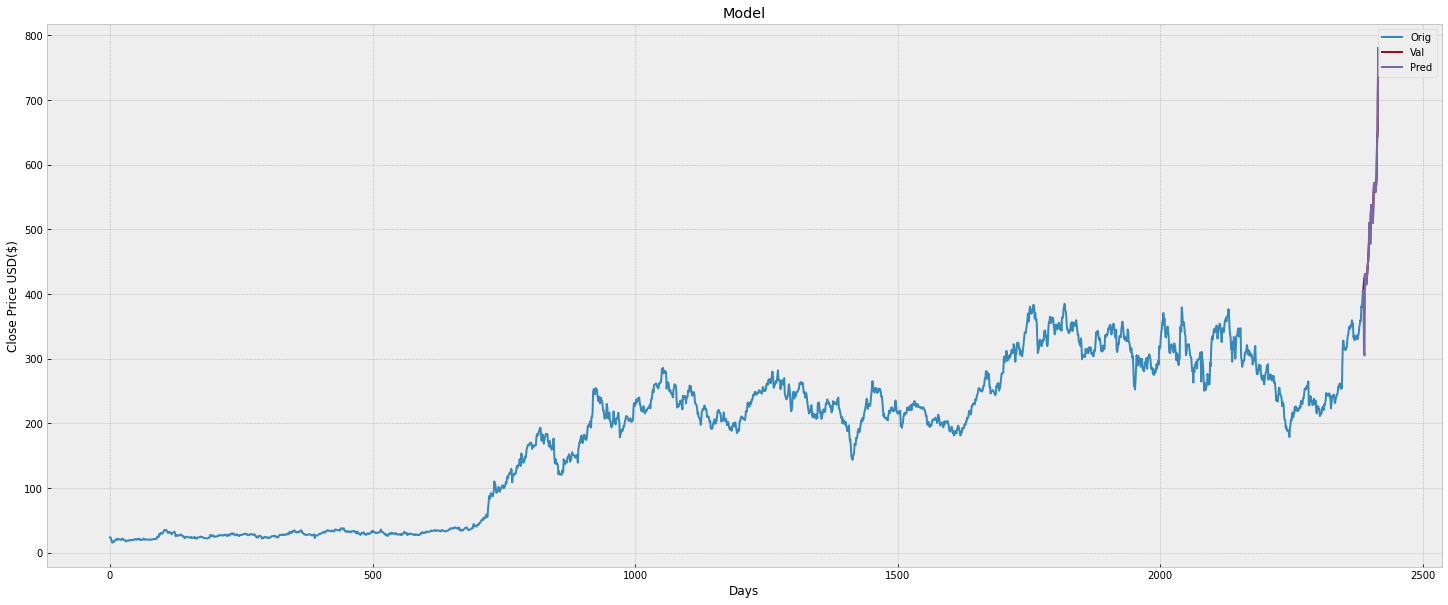

In [49]:
predictions = tree_prediction
valid = df[x.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(25,10))
plt.title('Model')
plt.xlabel("Days")
plt.ylabel("Close Price USD($)")
plt.plot(df['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


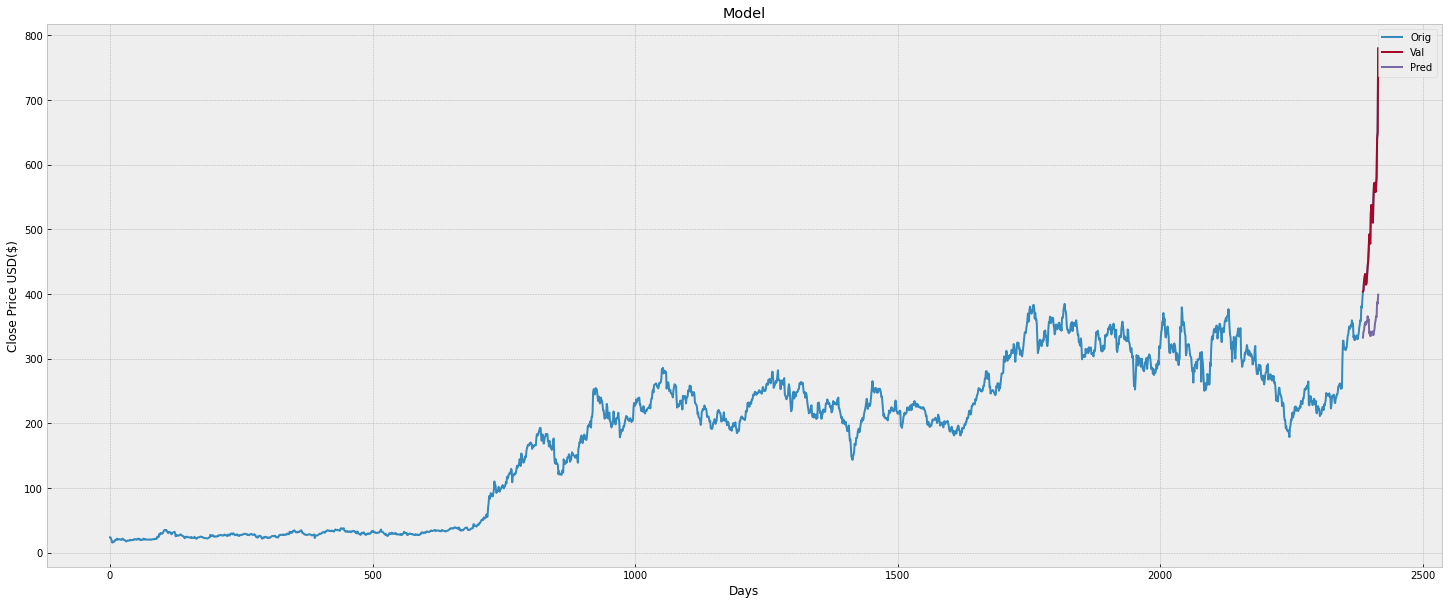

In [50]:
predictions = lr_prediction
valid = df[x.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(25,10))
plt.title('Model')
plt.xlabel("Days")
plt.ylabel("Close Price USD($)")
plt.plot(df['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()